# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [1]:
# Run this cell only if xgboost is not yet installed on Jupyter Notebook.
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.1/124.9 MB 656.4 kB/s eta 0:03:11
   ---------------------------------------- 0.1/124.9 MB 901.1 kB/s eta 0:02:19
   ---------------------------------------- 0.3/124.9 MB 1.4 MB/s eta 0:01:28
   ---------------------------------------- 0.5/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.7/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 1.4/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.1/124.9 MB 5.8 MB/s eta 0:00:21
    --------------------------------------- 2.6/124.9 MB 6.3 MB/s eta 0:00:20
   - -----------

In [2]:
# Import relevant libraries and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import *
from sklearn.model_selection import *
from sklearn.metrics import *

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Invistico_Airline.csv')

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [5]:
# Display the first ten rows of data.
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [6]:
# Display the data type for each column in your DataFrame.

airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

A: The target variable for passenger satisfaction is the 'satisfaction' column, which indicates whether or not the customer is satisfied. The initial hypothesis is the passenger satisfaction is dependent on the predicting variables like seat comfort, inflight entertainment, cleanliness, food and drink, and check-in service.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

A: The metrics that are most stuited to evaluating this type of model are recall, precision, and f1 scores.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [7]:
# Convert the object predictor variables to numerical dummies.

airline_dummies = pd.get_dummies(airline_data, columns=['satisfaction', 'Customer Type', 'Type of Travel', 'Class'])
airline_dummies.head(10)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,False,True,True,False,False,True,False,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,False,True,True,False,False,True,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,False,True,True,False,False,True,False,True,False
3,60,623,0,0,0,3,3,4,3,1,...,0.0,False,True,True,False,False,True,False,True,False
4,70,354,0,0,0,3,4,3,4,2,...,0.0,False,True,True,False,False,True,False,True,False
5,30,1894,0,0,0,3,2,0,2,2,...,0.0,False,True,True,False,False,True,False,True,False
6,66,227,0,0,0,3,2,5,5,5,...,15.0,False,True,True,False,False,True,False,True,False
7,10,1812,0,0,0,3,2,0,2,2,...,0.0,False,True,True,False,False,True,False,True,False
8,56,73,0,0,0,3,5,3,5,4,...,0.0,False,True,True,False,False,True,True,False,False
9,22,1556,0,0,0,3,2,0,2,2,...,26.0,False,True,True,False,False,True,False,True,False


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [8]:
# Define the y (target) variable.
y = airline_dummies['satisfaction_satisfied']

# Define the X (predictor) variables.
X = airline_dummies.copy()
X = X.drop(columns=['satisfaction_satisfied', 'satisfaction_dissatisfied'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [9]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [10]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective="binary:logistic", random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, consider tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`.

Consider a more limited range for each hyperparameter to allow for timely iteration and model training. For example, using a single possible value for each of the six hyperparameters listed above will take approximately one minute to run on this platform.

```
{
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
```

If you add just one new option, for example by changing `max_depth: [4]` to `max_depth: [3, 6]`, and keep everything else the same, you can expect the run time to approximately double. If you use two possibilities for each hyperparameter, the run time would extend to ~1 hour. 
         

In [11]:
# Define parameters for tuning as `cv_params`.

cv_params = {
    'max_depth': [4, 5],
    'min_child_weight': [3, 4],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [5, 10, 15],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

A: Adding more estimators to the GridSearch will improve the model's performance, but also increases the time spent will performing the GridSearch process. Also, there will be diminishing returns with each increase in estimators.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [16]:
# Define your criteria as `scoring`.
scoring = ['accuracy', 'precision', 'recall', 'f1']

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [17]:
# Construct your GridSearch.
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [18]:
%%time
# fit the GridSearch model to training data
xgb_cv.fit(X_train, y_train)

CPU times: total: 3min 54s
Wall time: 24.2 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 5],
                         'min_child_weight': [3, 4],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [19]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 15,
 'subsample': 0.7}

**Question:** Which optimal set of parameters did the GridSearch yield?

A: The optimal set of parameters that GridSearch yielded is listed as followed:

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 15,
 'subsample': 0.7}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [20]:
# Use `pickle` to save the trained model.
import pickle

#path = '/home/jovyan/work/'
with open('xgb_cv_model_result.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write) 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [21]:
# Apply your model to predict on your test data. Call this output "y_pred".

y_pred = xgb_cv.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [22]:
# 1. Print your accuracy score.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {}%".format(accuracy*100))

# 2. Print your precision score.
precision = precision_score(y_test, y_pred)
print("Precision score: {}%".format(precision*100))

# 3. Print your recall score.
recall = recall_score(y_test, y_pred)
print("Recall score: {}%".format(recall*100))

# 4. Print your f1 score.
f1 = f1_score(y_test, y_pred)
print("F1 score: {}%".format(f1*100))

Accuracy score: 92.08192177394518%
Precision score: 93.15857861137789%
Recall score: 92.38095238095238%
F1 score: 92.76813591741441%


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

A: The accuracy score for the XGBoost model is 92.081%, and this means the model did well in predicting the target variable.

**Question:** Is your accuracy score alone sufficient to evaluate your model?

A: Accuracy alone cannot suffice to evaluate the model since a very high accuracy doesn't guarantee that the model did pretty well. Perhaps there could be other factors that may contribute to high accuracy, like bias in the results and overfitting.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

A: If precision is to how many positive outcomes predicted correctly out of all positive outcomes, recall is to how many positive instances of the outcomes predicted correctly out of all instances predicted as positives. Depending on the context of the problem, recall will likely remain relevant in predicting dissatisfied customers whereas precision is more applicable in predicting whether the customer is satisfied. Since the precision score is 93.158% and the recall score is 92.380%, the model does well in predicting customer satisifaction.

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

A: The F1 score is the harmonic mean of the metrics, and is the overall metric on how well the model has performed in making predictions given with the recall and precision scores. The F1 score is 92.768%, and this too indicates the model did well in predicting customer satisfaction.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

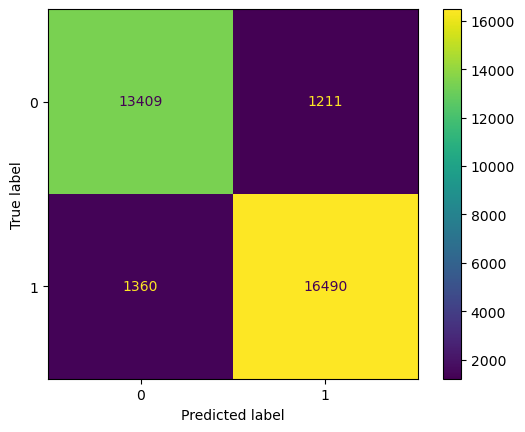

In [23]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
con_mat = confusion_matrix(y_test, y_pred, labels=xgb_cv.classes_)

# Create the display for your confusion matrix.
mat_disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=xgb_cv.classes_)

# Plot the visual in-line.
mat_disp.plot(values_format='')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

A: The majority of all values fall within the true positives and true negatives, and the combined sum of true positives and true negatives far outweigh the combined sum of false positives and false negatives. Thus, the confusion matrix correlates well with the metrics calculations, given with a high percentages above 90%.

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

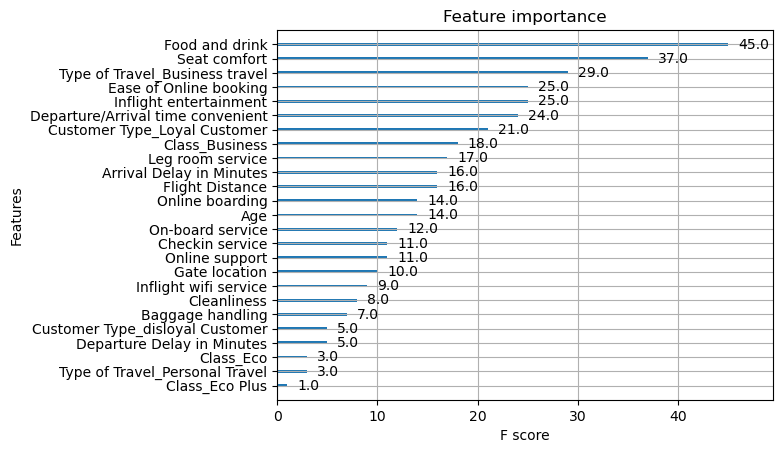

In [24]:
# Plot the relative feature importance of the predictor variables in your model.

plot_importance(xgb_cv.best_estimator_)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

A: If there are any features that stands out, "Food and drink" is the most important one that contributes to the model. Depending on the quality of the meals and beverages served, perhaps it may be the direct factor on affecting overall customer satisfaction. In contrast, the departure daly in minutes and bagging handling did not do much in contributing to the model prediction.

### Compare models

Create a table of results to compare model performance.

In [25]:
# Create a table of results to compare model performance.

table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.945099, 0.948567, f1],
                      'Recall': [0.935525, 0.945091, recall],
                      'Precision': [0.954892, 0.952070, precision],
                      'Accuracy': [0.940514, 0.943857, accuracy]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945099,0.935525,0.954892,0.940514
1,Tuned Random Forest,0.948567,0.945091,0.952070,0.943857
2,Tuned XGBoost,0.927681,0.923810,0.931586,0.920819


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and using the `pd.DataFrame()` function. 

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

A: All three of the models have performed effectively well in making predictions, owing with the metrics above 90%. Out of all the models, it is likely that random forest model did better than the decision tree and XGBoost models, given that all four metrics are slightly higher.

## Considerations

**What are some key takeaways you learned from this lab?**

A: It is important to use the metrics to evaluate the model and draw conclusions based on the results obtained. Furthermore, some metrics may be more relevant than others, and it is likely that accuracy alone cannot fully explain the effectiveness of the prediction model. Finally, comparing the models with each other is a useful way to determine which of the model did the best in yielding the highest metric scores on average. Primarily for this lab, it focuses on the implementation of XGBoost in a tree prediction model.

**How would you share your findings with your team?**

A: In addition to drawing conclusions based on the metrics scores and the confusion matrix, also point out any of the significant features that contributes to the model's performance, and do comparisons with other models to determine which of them is the best in making predictions.

**What would you share with and recommend to stakeholders?**

A: Like the decision tree and random forest model, the XGBoost model is effective in making predictions on customer satisifaction. For any features that may be worth further investigation, the food and drink service should be examined closely and have the stakeholders find out any significance of that feature for the model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged